In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
classifier = KNeighborsClassifier()

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
import numpy as np
rng = np.random.RandomState(0)

In [6]:
permutation = rng.permutation(len(X))

In [7]:
permutation

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52,   3, 149,  98,
         6,  68, 109,  96,  12, 102, 120, 104, 128,  46,  11, 110, 124,
        41, 148,   1, 113, 139,  42,   4, 129,  17,  38,   5,  53, 143,
       105,   0,  34,  28,  55,  75,  35,  23,  74,  31, 118,  57, 131,
        65,  32, 138,  14, 122,  19,  29, 130,  49, 136,  99,  82,  79,
       115, 145,  72,  77,  25,  81, 140, 142,  39,  58,  88,  70,  87,
        36,  21,   9, 103,  67, 117,  47])

In [8]:
X, y = X[permutation], y[permutation]

In [9]:
y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [10]:
k = 5
n_samples = len(X)
fold_size = n_samples // k

In [12]:
fold_size

30

In [13]:
masks = []
scores = []
for fold in range(k):
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    masks.append(test_mask)
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))

In [14]:
scores

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]

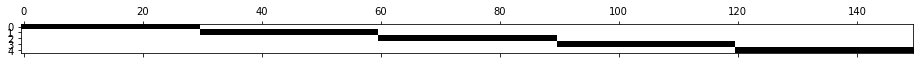

In [15]:
plt.matshow(masks, cmap='gray_r')

In [16]:
np.mean(scores)

0.96

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
scores = cross_val_score(classifier, X, y)
np.mean(scores)

0.9733333333333334

In [19]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

In [21]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [22]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.matshow(masks, cmap='gray_r')

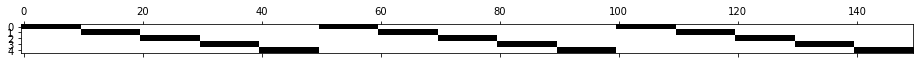

In [23]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

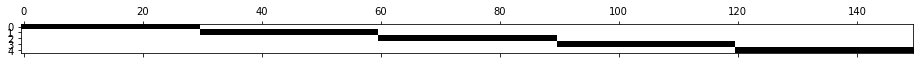

In [24]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

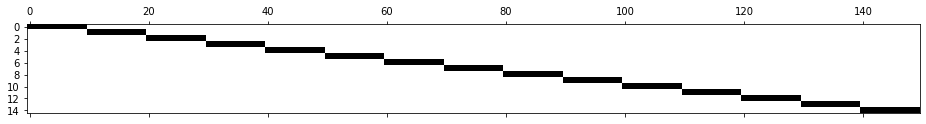

In [25]:
plot_cv(KFold(n_splits=15), iris.data, iris.target)

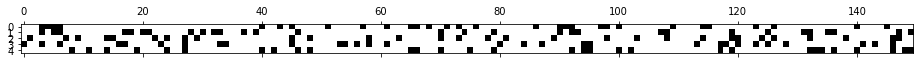

In [26]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

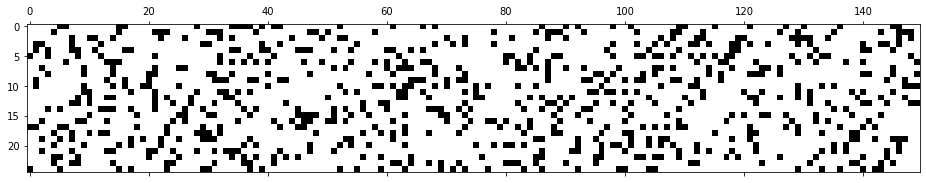

In [27]:
plot_cv(ShuffleSplit(n_splits=25, test_size=.2), iris.data, iris.target)

In [28]:
cv = ShuffleSplit(n_splits=5, test_size=.2)

In [29]:
cross_val_score(classifier, X, y, cv=cv)

array([0.96666667, 0.96666667, 0.96666667, 1.        , 0.93333333])

In [30]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [32]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)

In [34]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [35]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

In [36]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [38]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.949 total time=   0.1s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   1.2s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=1.000 total time=   1.2s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.987 total time=   2.6s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.987 total time=   2.6s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.975 total time=   1.7s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.975 total time=   1.7s
[CV 2/5] END ..C=100, gam